In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import NuSVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import NearestCentroid
import category_encoders as ce
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('dataset_final.csv')

In [3]:
model_collection = []

In [4]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
X = df.drop('Target',axis=1)
y = df.Target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
model_collection.append(('original batch',model.fit(X_train,y_train),model.score(X_train,y_train),model.score(X_test,y_test)))


In [11]:
y_pred = model.predict(X_test)

In [12]:
model.score(X_test,y_test)

0.49056603773584906

In [13]:
print((confusion_matrix(y_test,y_pred)))

[[25  0]
 [27  1]]


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        25
           1       1.00      0.04      0.07        28

    accuracy                           0.49        53
   macro avg       0.74      0.52      0.36        53
weighted avg       0.76      0.49      0.34        53



In [15]:
model = NuSVC()

In [16]:
model.fit(X_train,y_train)

NuSVC()

In [17]:
model_collection.append(('original batch NuSVC',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))

In [18]:
y_pred = model.predict(X_test)

In [19]:
model.score(X_test,y_test)

0.5849056603773585

In [20]:
print((confusion_matrix(y_test,y_pred)))

[[17  8]
 [14 14]]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.68      0.61        25
           1       0.64      0.50      0.56        28

    accuracy                           0.58        53
   macro avg       0.59      0.59      0.58        53
weighted avg       0.59      0.58      0.58        53



- Repeat for dataset of rotated images

In [22]:
df = pd.read_csv('dataset_final_rotated.csv')

In [23]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [24]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [25]:
X = df.drop('Target',axis=1)
y = df.Target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
model.score(X_test,y_test)

0.49056603773584906

In [31]:
print((confusion_matrix(y_test,y_pred)))

[[22  6]
 [21  4]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.79      0.62        28
           1       0.40      0.16      0.23        25

    accuracy                           0.49        53
   macro avg       0.46      0.47      0.42        53
weighted avg       0.46      0.49      0.44        53



In [33]:
model = NuSVC(probability=True)

In [34]:
model.fit(X_train,y_train)

NuSVC(probability=True)

In [35]:
model_collection.append(('rotated batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [36]:
y_pred = model.predict(X_test)

In [37]:
model.score(X_test,y_test)

0.7358490566037735

In [38]:
print((confusion_matrix(y_test,y_pred)))

[[21  7]
 [ 7 18]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.72      0.72      0.72        25

    accuracy                           0.74        53
   macro avg       0.73      0.73      0.73        53
weighted avg       0.74      0.74      0.74        53



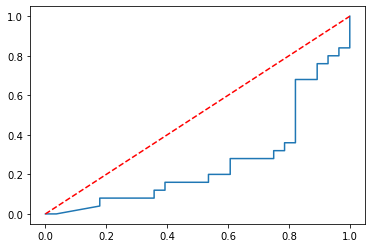

In [40]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- We load the dataset that includes age and sex for each image

In [41]:
df = pd.read_csv('df_agesex.csv')

In [42]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,1000,1001,Target
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,56,F,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36,M,0
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51,M,0
3,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,62,F,0
4,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,120,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29,F,1
258,121,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,44,F,1
259,122,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,37,M,1
260,123,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,46,F,1


In [43]:
import seaborn as sns

In [44]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [45]:
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

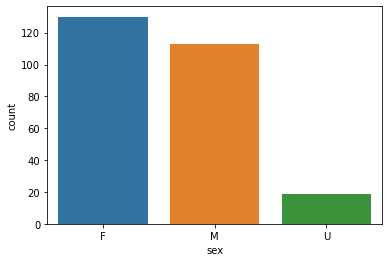

In [46]:
sns.countplot(data=df, x='sex')

In [47]:
df['age'].value_counts()

999    29
46     12
41     12
54     11
49     10
40     10
45      8
43      8
66      8
61      8
56      7
64      7
53      6
55      6
30      6
32      6
59      6
57      5
36      5
52      5
44      5
34      5
42      4
29      4
38      4
35      4
47      4
69      4
62      4
51      4
31      3
70      3
33      3
65      3
60      3
58      3
50      3
39      2
63      2
37      2
67      2
48      2
72      2
73      2
28      2
24      2
22      1
21      1
75      1
23      1
25      1
12      1
Name: age, dtype: int64

In [48]:
len(df[(df['age'] == 999) | (df['sex'] == 'U')]) / len(df)

0.11450381679389313

- since the percentage is moderatly low, we drop rows with unknown sex and age

In [49]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

<AxesSubplot:xlabel='Target', ylabel='count'>

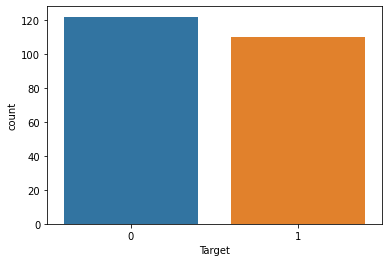

In [50]:
sns.countplot(data=df,x='Target')

- Target variable is still pretty balanced

- We proceed to encode sex feature

In [51]:
encoder = ce.BinaryEncoder()

In [52]:
encoder.fit_transform(df['sex'])

,sex_0,sex_1
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
257,0,1
258,0,1
259,1,0
260,0,1


In [53]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [54]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [55]:
X = df.drop(['Target','sex'],axis=1)
y = df.Target

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [57]:
model = NuSVC(probability=True)

In [58]:
model.fit(X_train,y_train)

NuSVC(probability=True)

In [59]:
model_collection.append(('sex-age original batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [60]:
y_pred = model.predict(X_test)

In [61]:
model.score(X_test,y_test)

0.48936170212765956

In [62]:
print((confusion_matrix(y_test,y_pred)))

[[16 16]
 [ 8  7]]


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        32
           1       0.30      0.47      0.37        15

    accuracy                           0.49        47
   macro avg       0.49      0.48      0.47        47
weighted avg       0.55      0.49      0.51        47



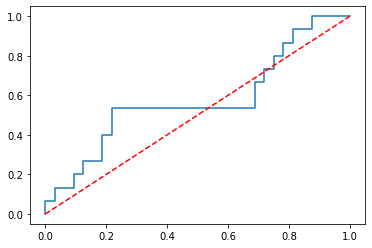

In [64]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- Model for cropped images

In [65]:
df = pd.read_csv('df_cropped.csv')

In [66]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [67]:
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

In [68]:
df_origin = df.copy()

In [69]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

In [70]:
encoder = ce.BinaryEncoder()

In [71]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [72]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [73]:
X = df.drop(['Target','sex'],axis=1)
y = df.Target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [75]:
model = NuSVC(probability=True)

In [76]:
model.fit(X_train,y_train)

NuSVC(probability=True)

In [77]:
model_collection.append(('cropped original batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [78]:
y_pred = model.predict(X_test)

In [79]:
model.score(X_test,y_test)

0.5531914893617021

In [80]:
print((confusion_matrix(y_test,y_pred)))

[[15 12]
 [ 9 11]]


In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        27
           1       0.48      0.55      0.51        20

    accuracy                           0.55        47
   macro avg       0.55      0.55      0.55        47
weighted avg       0.56      0.55      0.56        47



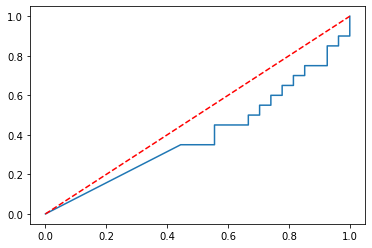

In [82]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- model for cropped images without age and sex features

In [83]:
X = df.drop(['Target','sex','sex_0','sex_1','age'],axis=1)
y = df.Target

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [85]:
model = NuSVC(probability=True)
model.fit(X_train, y_train)

NuSVC(probability=True)

In [86]:
model_collection.append(('cropped no sex-age original batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [87]:
y_pred = model.predict(X_test)

In [88]:
model.score(X_test,y_test)

0.3829787234042553

In [89]:
print((confusion_matrix(y_test,y_pred)))

[[ 8  9]
 [20 10]]


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.47      0.36        17
           1       0.53      0.33      0.41        30

    accuracy                           0.38        47
   macro avg       0.41      0.40      0.38        47
weighted avg       0.44      0.38      0.39        47



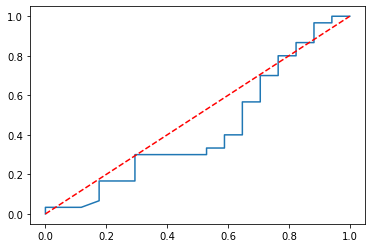

In [91]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- cropped images not including age and sex, and without dropping rows

In [92]:
X = df_origin.drop(['Target','sex','age'],axis=1)
y = df_origin.Target

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [94]:
model = NuSVC(probability=True)
model.fit(X_train, y_train)

NuSVC(probability=True)

In [95]:
model_collection.append(('cropped NO age-sex full row original batch',
                         model.fit(X_train,y_train),
                         model.score(X_train,y_train),
                         model.score(X_test,y_test)
                         ))

In [96]:
y_pred = model.predict(X_test)

In [97]:
model.score(X_train,y_train)

0.9712918660287081

In [98]:
model.score(X_test,y_test)

0.5094339622641509

In [99]:
print((confusion_matrix(y_test,y_pred)))

[[17  7]
 [19 10]]


In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.71      0.57        24
           1       0.59      0.34      0.43        29

    accuracy                           0.51        53
   macro avg       0.53      0.53      0.50        53
weighted avg       0.54      0.51      0.49        53



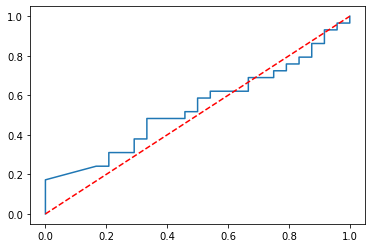

In [101]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- Added new batch of xrays

In [102]:
df = pd.read_csv('df_cropped_2.csv')

In [103]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.rename(columns={'1000':'age', '1001':'sex'},inplace=True)

In [104]:
df_origin = df.copy()

In [105]:
df.drop(df[(df['age'] == 999) | (df['sex'] == 'U')].index, axis=0,inplace=True)

In [106]:
encoder = ce.BinaryEncoder()

In [107]:
df['sex_0'] = encoder.fit_transform(df['sex'])['sex_0']

In [108]:
df['sex_1'] = encoder.fit_transform(df['sex'])['sex_1']

In [109]:
X = df.drop(['Target','sex','age'],axis=1)
y = df.Target

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [111]:
y_train

251    1
165    0
338    1
46     0
223    1
      ..
107    0
261    1
201    1
126    0
260    1
Name: Target, Length: 284, dtype: int64

In [112]:
model = NuSVC(probability=True)

In [113]:
model.fit(X_train,y_train)

NuSVC(probability=True)

In [114]:
model_collection.append(('cropped new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [115]:
y_pred = model.predict(X_test)

In [116]:
model.score(X_test,y_test)

0.5492957746478874

In [117]:
print((confusion_matrix(y_test,y_pred)))

[[17 18]
 [14 22]]


In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52        35
           1       0.55      0.61      0.58        36

    accuracy                           0.55        71
   macro avg       0.55      0.55      0.55        71
weighted avg       0.55      0.55      0.55        71



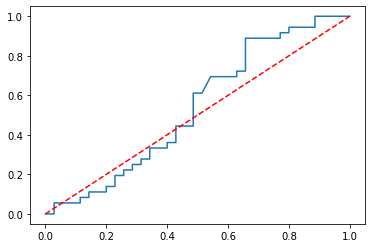

In [119]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- model for cropped images without age and sex features

In [120]:
X = df.drop(['Target','sex','age','sex_0','sex_1'],axis=1)
y = df.Target

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [122]:
model = NuSVC(probability=True)
model.fit(X_train, y_train)

NuSVC(probability=True)

In [123]:
model_collection.append(('cropped NO age-sex new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [124]:
y_pred = model.predict(X_test)

In [125]:
model.score(X_train,y_train)

0.9577464788732394

In [126]:
model.score(X_test,y_test)

0.5915492957746479

In [127]:
print((confusion_matrix(y_test,y_pred)))

[[18 13]
 [16 24]]


In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55        31
           1       0.65      0.60      0.62        40

    accuracy                           0.59        71
   macro avg       0.59      0.59      0.59        71
weighted avg       0.60      0.59      0.59        71



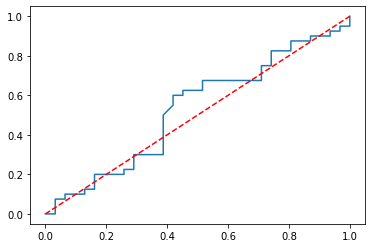

In [129]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

- cropped images not including age and sex, and without dropping rows

In [130]:
X = df_origin.drop(['Target','sex','age'],axis=1)
y = df_origin.Target

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [132]:
model = NuSVC()
model.fit(X_train, y_train)

NuSVC()

In [133]:
model_collection.append(('cropped NO age-sex full rows new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)
                         ))

In [134]:
y_pred = model.predict(X_test)

In [135]:
model.score(X_train,y_train)

0.9644012944983819

In [136]:
model.score(X_test,y_test)

0.41025641025641024

In [137]:
print((confusion_matrix(y_test,y_pred)))

[[16 26]
 [20 16]]


In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.38      0.41        42
           1       0.38      0.44      0.41        36

    accuracy                           0.41        78
   macro avg       0.41      0.41      0.41        78
weighted avg       0.42      0.41      0.41        78



- separated by sex

In [139]:
df_f = df_origin[df_origin.sex=='F']
df_m = df_origin[df_origin.sex=='M']

In [140]:
X = df_f.drop(['Target','sex','age'],axis=1)
y = df_f.Target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = NuSVC(probability=True)
model.fit(X_train, y_train)
model_collection.append(('female dataframe new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))
y_pred = model.predict(X_test)


In [141]:
model.score(X_train,y_train)

0.9671052631578947

In [142]:
model.score(X_test,y_test)

0.6578947368421053

In [143]:
print((confusion_matrix(y_test,y_pred)))

[[ 8  4]
 [ 9 17]]


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.81      0.65      0.72        26

    accuracy                           0.66        38
   macro avg       0.64      0.66      0.64        38
weighted avg       0.70      0.66      0.67        38



In [145]:
p = model.predict_proba(X_test)

In [146]:
fpr, tpr, th = roc_curve(y_test, p[:,1])

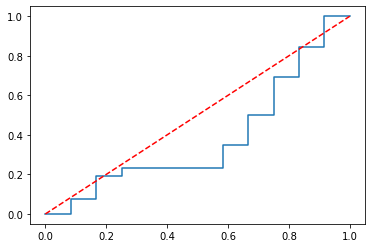

In [147]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [148]:
auc(fpr, tpr)

0.38141025641025644

In [149]:
X = df_m.drop(['Target','sex','age'],axis=1)
y = df_m.Target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = NuSVC(probability=True)
model.fit(X_train, y_train)
model_collection.append(('male dataframe new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))
y_pred = model.predict(X_test)

In [150]:
model.score(X_train,y_train)

0.95

In [151]:
model.score(X_test,y_test)

0.6111111111111112

In [152]:
print((confusion_matrix(y_test,y_pred)))

[[ 9  9]
 [ 5 13]]


In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.59      0.72      0.65        18

    accuracy                           0.61        36
   macro avg       0.62      0.61      0.61        36
weighted avg       0.62      0.61      0.61        36



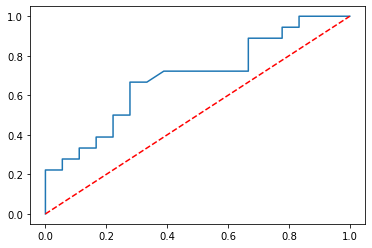

In [154]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [155]:
auc(fpr, tpr)

0.6898148148148148

- separated by sex and including age

In [156]:
df_f.drop(df_f[df_f.age == 999].index,axis=0,inplace=True)

In [157]:
df_m.drop(df_m[df_m.age == 999].index,axis=0,inplace=True)

In [158]:
X = df_f.drop(['Target','sex','age'],axis=1)
y = df_f.Target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = NuSVC(probability=True)
model.fit(X_train, y_train)
model_collection.append(('female dataframe age new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))
y_pred = model.predict(X_test)

In [159]:
model.score(X_train,y_train)

0.972972972972973

In [160]:
model.score(X_test,y_test)

0.3783783783783784

In [161]:
print((confusion_matrix(y_test,y_pred)))

[[ 4 11]
 [12 10]]


In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26        15
           1       0.48      0.45      0.47        22

    accuracy                           0.38        37
   macro avg       0.36      0.36      0.36        37
weighted avg       0.38      0.38      0.38        37



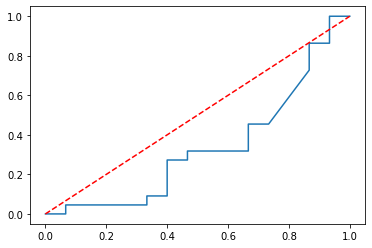

In [163]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [164]:
X = df_m.drop(['Target','sex','age'],axis=1)
y = df_m.Target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = NuSVC(probability=True)
model.fit(X_train, y_train)
model_collection.append(('male dataframe age new batch',model.fit(X_train,y_train),
                         model.score(X_train,y_train),model.score(X_test,y_test)))
y_pred = model.predict(X_test)

In [165]:
model.score(X_train,y_train)

0.9632352941176471

In [166]:
model.score(X_test,y_test)

0.4411764705882353

In [167]:
print((confusion_matrix(y_test,y_pred)))

[[10  4]
 [15  5]]


In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.71      0.51        14
           1       0.56      0.25      0.34        20

    accuracy                           0.44        34
   macro avg       0.48      0.48      0.43        34
weighted avg       0.49      0.44      0.41        34



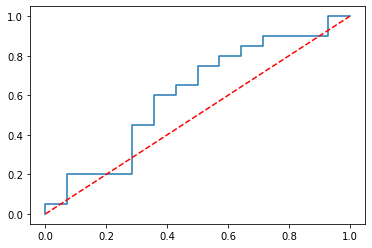

In [169]:
p = model.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, p[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [170]:
import pickle

In [171]:
models_df = pd.DataFrame(
    columns= ['name','model','train score','test score'],
    index= range(0,len(model_collection)))

In [172]:
pos = 0
for i in model_collection:
    models_df.loc[pos,'name'] = i[0]
    models_df.loc[pos,'model'] = i[1]
    models_df.loc[pos,'train score'] = i[2]
    models_df.loc[pos,'test score'] = i[3]
    pos += 1

In [173]:
models_df.sort_values('test score',ascending=False)

,name,model,train score,test score
2,rotated batch,NuSVC(probability=True),0.99,0.74
10,female dataframe new batch,NuSVC(probability=True),0.97,0.66
11,male dataframe new batch,NuSVC(probability=True),0.95,0.61
8,cropped NO age-sex new batch,NuSVC(probability=True),0.96,0.59
1,original batch NuSVC,NuSVC(),0.99,0.58
4,cropped original batch,NuSVC(probability=True),0.43,0.55
7,cropped new batch,NuSVC(probability=True),0.94,0.55
6,cropped NO age-sex full row original batch,NuSVC(probability=True),0.97,0.51
0,original batch,LogisticRegression(),0.53,0.49
3,sex-age original batch,NuSVC(probability=True),0.44,0.49
